In [63]:
from CoolProp.CoolProp import PropsSI
import matplotlib.pyplot as plt
import numpy as np

In [66]:
class Material:
    def __init__(self, thermal_cond):
        self.thermal_cond = thermal_cond

class Room:
    def __init__(self, size, outside_temp, desired_temp, wall_material, floor_material, ceiling_material, wall_thickness, floor_thickness, ceiling_thickness):
        self.size = size
        self.outside_temp = outside_temp
        self.desired_temp = desired_temp
        self.wall_material = wall_material
        self.floor_material = floor_material
        self.ceiling_material = ceiling_material
        self.wall_thickness = wall_thickness
        self.floor_thickness = floor_thickness
        self.ceiling_thickness = ceiling_thickness

    def walls_area(self):
        return self.size[0]*self.size[2]*2 + self.size[1]*self.size[2]

    def floor_area(self):
        return self.size[0]*self.size[1]

    def total_surface_area(self):
        return self.walls_area() + self.floor_area()*2

    def heat_power_demand(self, material, thickness, insulator_area):
        heat_transfer_coeff = material.thermal_cond / thickness # U = k/L
        delta_temperature = self.desired_temp - self.outside_temp
        heat_demand = heat_transfer_coeff * insulator_area * delta_temperature
        return heat_demand

    def total_energy_demand(self):
        hpd_walls = self.heat_power_demand(self.wall_material, self.wall_thickness/100, self.walls_area())
        hpd_floor = self.heat_power_demand(self.floor_material, self.floor_thickness/100, self.floor_area())
        hpd_ceiling = self.heat_power_demand(self.ceiling_material, self.ceiling_thickness/100, self.floor_area())
        return hpd_walls + hpd_floor + hpd_ceiling

polyurethane_foam = Material(0.022)
concrete = Material(0.11)
# Room size: 3x1.5x2 m, outside temperature: -10°C, desired temperature: 15°C,
# wall: polyurethane foam, floor: concrete, ceiling: polyurethane foam, wall thickness: 15 cm, floor thickness: 50 cm, ceiling thickness: 17 cm
room = Room([3,1.5,2], 15 + 273.15, -10 + 273.15, polyurethane_foam, concrete, polyurethane_foam, 15, 50, 17)

print(f"Heat power demand for cold room: {room.total_energy_demand():.2f} kW")

Heat power demand for cold room: -94.31 kW


               Month          Avg Temp [°C]  Power Demand [kW]
               Jan            1.7            -44.14         
               Feb            2              -45.27         
               Mar            4.5            -54.70         
               Apr            9.1            -72.05         
               May            13.3           -87.90         
               Jun            16.3           -99.21         
               Jul            18.5           -107.51        
               Aug            18.1           -106.00        
               Sep            14.9           -93.93         
               Oct            10.5           -77.33         
               Nov            6              -60.36         
               Dec            3              -49.04         


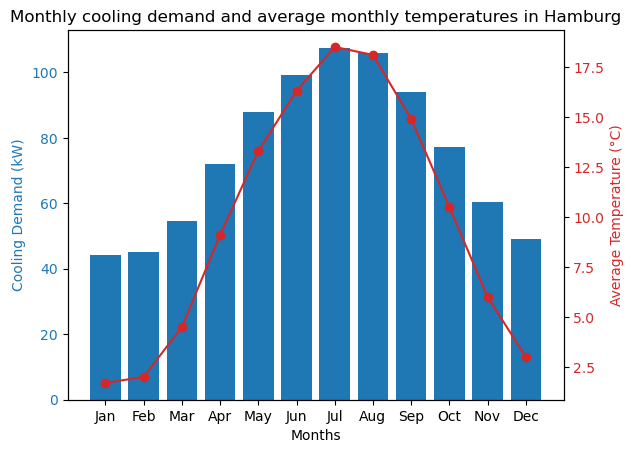

In [93]:
# Assumed data (replace with actual data)
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
heating_demand = []
average_temperature_hamburg = [1.7, 2, 4.5, 9.1, 13.3, 16.3, 18.5, 18.1, 14.9, 10.5, 6, 3]

# Print heating demand and average temperature for each month
headers = ["Month", "Avg Temp [°C]", "Power Demand [kW]"]
row_format ="{:<15}" * (len(headers) + 1)
print(row_format.format("", *headers))
for avg_temp in average_temperature_hamburg:
    room.outside_temp = avg_temp + 273.15
    heating_demand.append(abs(room.total_energy_demand()))
    print(row_format.format("", months[average_temperature_hamburg.index(avg_temp)], avg_temp, f"{room.total_energy_demand():.2f}"))

# Create figure and axis objects
fig, ax1 = plt.subplots()

# Plot heating demand as bar chart with blue color
ax1.bar(months, heating_demand, color='tab:blue')
ax1.set_xlabel('Months')
ax1.set_ylabel('Cooling Demand (kW)', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a twin axis for average temperature
ax2 = ax1.twinx()

# Plot average temperature as line graph with red color
ax2.plot(months, average_temperature_hamburg, marker='o', color='tab:red')
ax2.set_ylabel('Average Temperature (°C)', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Set title and display the plot
plt.title('Monthly cooling demand and average monthly temperatures in Hamburg')
plt.show()


In [ ]:
from prettytable import PrettyTable

# Define the table
table = PrettyTable()

# Add the headers
table.field_names = ["Month", "Avg Temp [°C]", "Power Demand [kW]"]

# Add the rows
for avg_temp in average_temperature_hamburg:
    room.outside_temp = avg_temp + 273.15
    heating_demand.append(abs(room.total_energy_demand()))
    table.add_row([months[average_temperature_hamburg.index(avg_temp)], avg_temp, f"{room.total_energy_demand():.2f}"])

# Print the table
print(table)

In [53]:
cond_temp = room.outside_temp + 20
evap_temp = room.desired_temp - 10
print(f"Condensing temperature: {cond_temp:.2f} K ({cond_temp-273.15:.2f} °C)") 
print(f"Evaporating temperature: {evap_temp:.2f} K ({evap_temp-273.15:.2f} °C)")

Condensing temperature: 308.15 K (35.00 °C)
Evaporating temperature: 253.15 K (-20.00 °C)


In [55]:
#PropsSI("H", "T", evap_temp, "Q", 0, "R290")
#PropsSI("H", "T", -25, "Q", 0, "R134a")
#PropsSI("H", "P", 100000, "Q", 1, "R134a")

In [56]:
outside_temp = 15 + 273.15 # C
desired_temp = -10 + 273.15 # C

cond_temp = outside_temp + 20
evap_temp = desired_temp - 10

fluid = "R290"
t_2 = evap_temp # T_evap (K)
t_4 = cond_temp # T_cond (K)
eta_s = 0.8 # Efficiency assumed to be 80%
heat_evap = 2e5 # Nominal heat power (W)

print("t_2: ",t_2)
print("t_4: ",t_4)

p_2 = PropsSI("P", "T", t_2, "Q", 1, fluid)
p_4 = PropsSI("P", "T", t_4, "Q", 0, fluid)

h_2 = PropsSI("H", "T", t_2, "Q", 1, fluid)
s_2 = PropsSI("S", "T", t_2, "Q", 1, fluid)

p_3 = p_4 # pressure remains same after compressor / before expansion
h_3s = PropsSI("H", "S", s_2, "P", p_3, fluid)
h_3 = h_2 + (h_3s - h_2) / eta_s # enthalpy considering compressor efficiency

h_4 = PropsSI("H", "T", t_4, "Q", 0, fluid)
h_1 = h_4 # enthalpy remains constant in expansion. refer to ph graph
p_1 = p_2 # pressure remains constant in evaporation.

# no calculamos s_1, s_3, s_4, t_1, t_3

m = heat_evap / (h_2 - h_1) # mass flow rate kg/s. Are these enthalpies correct? or should we get h_4, h_3
power = m * (h_3 - h_2) # compressor power
cop = abs(heat_evap) / power
heat_cond = abs(heat_evap) - power

print(cop)
print(power)
print(heat_cond)

t_2:  253.14999999999998
t_4:  308.15
2.7492250284433646
72747.77362013242
127252.22637986758


2.1219758825632935
2.2308871431473407
2.347255813436239
2.4718386683844233
2.605498814512353
2.7492250284433646
2.9041554746595724
3.0716070045017045
3.2531116310317105
3.450462318096574


Text(0.5, 1.0, 'COP vs Evaporated T')

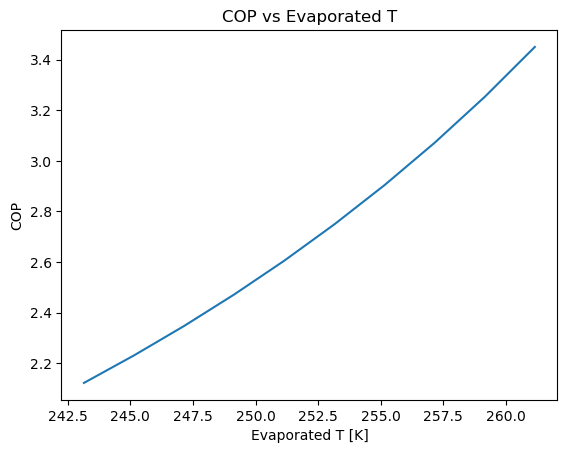

In [57]:
outside_temp = 15 + 273.15 # C
desired_temp = -10 + 273.15 # C

cond_temp = outside_temp + 20
evap_temp = desired_temp - 10

evap_temp_list = np.arange(evap_temp - 10 , evap_temp + 10 , 2)
#cond_temp_list = np.arange(evap_temp - 10 , evap_temp + 10 , 2)
cop_list = []
#cond_temp = -20+273
# print(*cond_temp_list)

for evap_temp in (evap_temp_list):
    fluid = "R290"
    t_2 = evap_temp # T_evap (K)
    t_4 = cond_temp # T_cond (K)
    eta_s = 0.8 # Efficiency assumed to be 80%
    heat_evap = 2e5 # Nominal heat power (W)

    p_2 = PropsSI("P", "T", t_2, "Q", 1, fluid)
    p_4 = PropsSI("P", "T", t_4, "Q", 0, fluid)

    h_2 = PropsSI("H", "T", t_2, "Q", 1, fluid)
    s_2 = PropsSI("S", "T", t_2, "Q", 1, fluid)

    p_3 = p_4 # pressure remains same after compressor / before expansion
    h_3s = PropsSI("H", "S", s_2, "P", p_3, fluid)
    h_3 = h_2 + (h_3s - h_2) / eta_s # enthalpy considering compressor efficiency

    h_4 = PropsSI("H", "T", t_4, "Q", 0, fluid)
    h_1 = h_4 # enthalpy remains constant in expansion. refer to ph graph
    p_1 = p_2 # pressure remains constant in evaporation.

    # no calculamos s_1, s_3, s_4, t_1, t_3

    m = heat_evap / abs(h_2 - h_1) # mass flow rate kg/s. Are these enthalpies correct? or should we get h_4, h_3
    power = m * abs(h_3 - h_2) # compressor power
    cop = abs(heat_evap) / power
    heat_cond = abs(heat_evap) - power

    print(cop)
    #print(power)
    #print(heat_cond)
    cop_list.append(cop)


plt.plot(evap_temp_list, cop_list)

# Plotting multiple lines on a single plot
#plt.plot(x, y1, label='Sin(x)', color='b')
#plt.plot(x, y2, label='Cos(x)', color='r', linestyle='--')
 
# Adding labels and title
plt.xlabel('Evaporated T [K]')
plt.ylabel('COP')
plt.title('COP vs Evaporated T')

evap_temp:  253.14999999999998
cond_temp:  298.15
evap_temp:  253.14999999999998
cond_temp:  300.15
evap_temp:  253.14999999999998
cond_temp:  302.15
evap_temp:  253.14999999999998
cond_temp:  304.15
evap_temp:  253.14999999999998
cond_temp:  306.15
evap_temp:  253.14999999999998
cond_temp:  308.15
evap_temp:  253.14999999999998
cond_temp:  310.15
evap_temp:  253.14999999999998
cond_temp:  312.15
evap_temp:  253.14999999999998
cond_temp:  314.15
evap_temp:  253.14999999999998
cond_temp:  316.15


Text(0.5, 1.0, 'COP vs Condensated T')

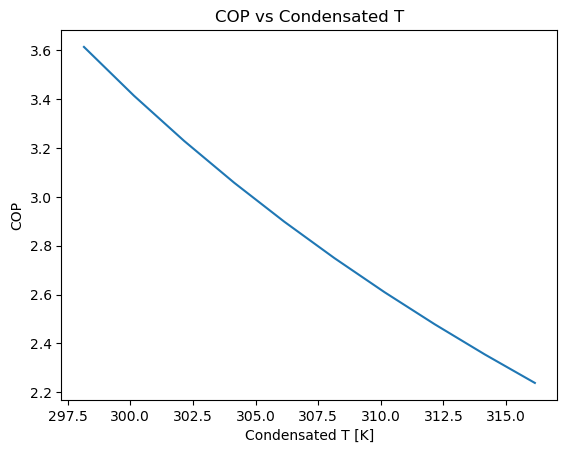

In [58]:
import matplotlib.pyplot as plt
import numpy as np

outside_temp = 15 + 273.15 # C
desired_temp = -10 + 273.15 # C

cond_temp = outside_temp + 20
evap_temp = desired_temp - 10

#evap_temp_list = np.arange(evap_temp - 10 , evap_temp + 10 , 2)
cond_temp_list = np.arange(cond_temp - 10 , cond_temp + 10 , 2)

cop_list = []
#cond_temp = -20+273
#print(*cond_temp_list)

for cond_temp in (cond_temp_list):
    print("evap_temp: ",evap_temp)
    print("cond_temp: ",cond_temp)
    fluid = "R290"
    t_2 = evap_temp # T_evap (K)
    t_4 = cond_temp # T_cond (K)
    eta_s = 0.8 # Efficiency assumed to be 80%
    heat_evap = 2e5 # Nominal heat power (W)

    p_2 = PropsSI("P", "T", t_2, "Q", 1, fluid)
    p_4 = PropsSI("P", "T", t_4, "Q", 0, fluid)

    h_2 = PropsSI("H", "T", t_2, "Q", 1, fluid)
    s_2 = PropsSI("S", "T", t_2, "Q", 1, fluid)

    p_3 = p_4 # pressure remains same after compressor / before expansion
    h_3s = PropsSI("H", "S", s_2, "P", p_3, fluid)
    h_3 = h_2 + (h_3s - h_2) / eta_s # enthalpy considering compressor efficiency

    h_4 = PropsSI("H", "T", t_4, "Q", 0, fluid)
    h_1 = h_4 # enthalpy remains constant in expansion. refer to ph graph
    p_1 = p_2 # pressure remains constant in evaporation.

    # no calculamos s_1, s_3, s_4, t_1, t_3

    m = heat_evap / abs(h_2 - h_1) # mass flow rate kg/s. Are these enthalpies correct? or should we get h_4, h_3
    power = m * abs(h_3 - h_2) # compressor power
    cop = abs(heat_evap) / power
    heat_cond = abs(heat_evap) - power

    #print(cop)
    #print(power)
    #print(heat_cond)
    cop_list.append(cop)


plt.plot(cond_temp_list, cop_list)

# Plotting multiple lines on a single plot
#plt.plot(x, y1, label='Sin(x)', color='b')
#plt.plot(x, y2, label='Cos(x)', color='r', linestyle='--')
 
# Adding labels and title
plt.xlabel('Condensated T [K]')
plt.ylabel('COP')
plt.title('COP vs Condensated T')

Now, let's plot both the condensated T° and the evaporated T° in the same 3D graph to compare values:

NameError: name 't_4_range' is not defined

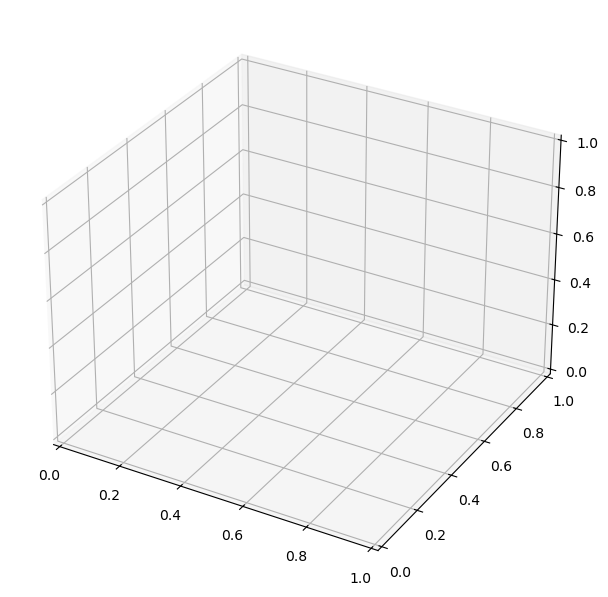

In [59]:
from matplotlib import cm

fig, ax = plt.subplots(1, figsize=(12, 7.5), subplot_kw={"projection": "3d"})

X, Y = np.meshgrid(t_4_range, t_2_range)

surf = ax.plot_surface(X, Y, cop_parametric.values, cmap=cm.coolwarm, linewidth=0, antialiased=False)

ax.set_xlabel("Condensation temperature in °C")
ax.set_ylabel("Evaporation temperature in °C")
ax.set_zlabel("COP")
ax.view_init(elev=30, azim=225)
ax.set_box_aspect(aspect=None, zoom=0.9)
fig.colorbar(surf, shrink=0.5, aspect=15)
plt.tight_layout()